# Esempi con la classe `Series`

In questo notebook mostriamo come utilizzare la classe `Series` per raccogliere le serie temporali generate dal sistema di Lorenz 63 al variare del parametro di controllo $\rho$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from series import Series
from timeseries_generators import lorenz63

In [2]:
r_values = [10, 15, 20, 24, 26, 28, 35]
dt = 0.01
steps = 6000
transient = 2000
sigma = 10.0
beta = 8.0 / 3.0

lorenz_series_instances = []
for rho in r_values:
    trajectory = lorenz63(sigma=sigma, rho=rho, beta=beta, dt=dt, steps=steps, transient=transient)
    x_component = trajectory[:, 0]
    normalized = (x_component - np.mean(x_component)) / np.std(x_component)
    series = Series(
        name="Lorenz 63",
        data=normalized,
        parameters={"sigma": sigma, "rho": rho, "beta": beta, "dt": dt},
        metadata={"component": "x"},
    )
    lorenz_series_instances.append(series)

summary = pd.DataFrame(
    {
        "rho": [s.parameters["rho"] for s in lorenz_series_instances],
        "campioni": [s.n_samples for s in lorenz_series_instances],
        "componenti": [s.n_components for s in lorenz_series_instances],
    }
)
summary

,rho,campioni,componenti
0,10,6000,1
1,15,6000,1
2,20,6000,1
3,24,6000,1
4,26,6000,1
5,28,6000,1
6,35,6000,1


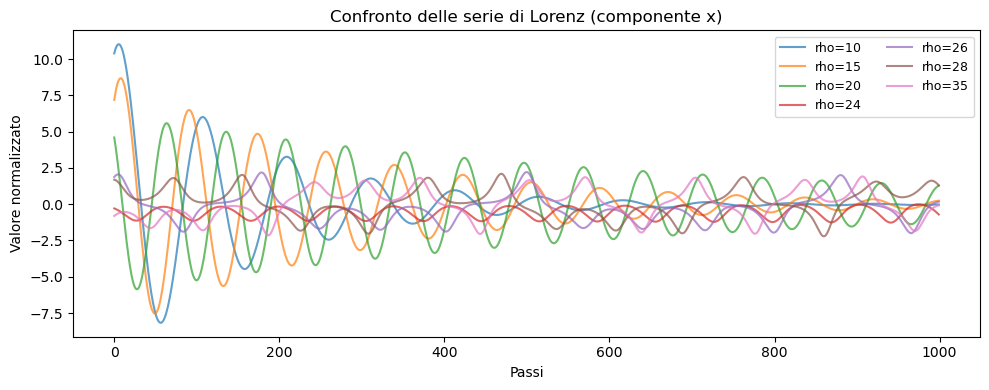

In [3]:
plt.figure(figsize=(10, 4))
for series in lorenz_series_instances:
    label = f"rho={series.parameters['rho']}"
    plt.plot(series.component(0)[:1000], label=label, alpha=0.7)
plt.title("Confronto delle serie di Lorenz (componente x)")
plt.xlabel("Passi")
plt.ylabel("Valore normalizzato")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()